In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys 
import scipy
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from scipy.io import arff
from sklearn.metrics import precision_score

import os
os.chdir("C:/Users/USER/Documents/my_DS_projects/SUPERVISED/classification/bankruptcy-prediction")
print("Current Directory:", os.getcwd())

Current Directory: C:\Users\USER\Documents\my_DS_projects\SUPERVISED\classification\bankruptcy-prediction


In [50]:
data = arff.loadarff("3year.csv")
df = pd.DataFrame(data[0])
print(df.shape)
df.head()

(10503, 65)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [51]:
# Inspect DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10485 non-null  float64
 4   Attr5   10478 non-null  float64
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10489 non-null  float64
 8   Attr9   10500 non-null  float64
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10485 non-null  float64
 12  Attr13  10460 non-null  float64
 13  Attr14  10503 non-null  float64
 14  Attr15  10495 non-null  float64
 15  Attr16  10489 non-null  float64
 16  Attr17  10489 non-null  float64
 17  Attr18  10503 non-null  float64
 18  Attr19  10460 non-null  float64
 19  Attr20  10460 non-null  float64
 20  Attr21  9696 non-null   float64
 21  Attr22  10503 non-null  float64
 22

We know all our features are numerical except our target feature and that we have missing data.

In [52]:
df['class'].value_counts()

b'0'    10008
b'1'      495
Name: class, dtype: int64

In [53]:
df['bankrupt'] = df['class'].str.decode('utf-8').astype(int).astype(bool)
df.drop(columns=['class'], inplace=True) 
df['bankrupt'].value_counts()

False    10008
True       495
Name: bankrupt, dtype: int64

It's a good idea to do some visualizations to see if there are any interesting trends or ideas we should keep in mind while we work. First, let's take a look at how many firms are bankrupt, and how many are not.

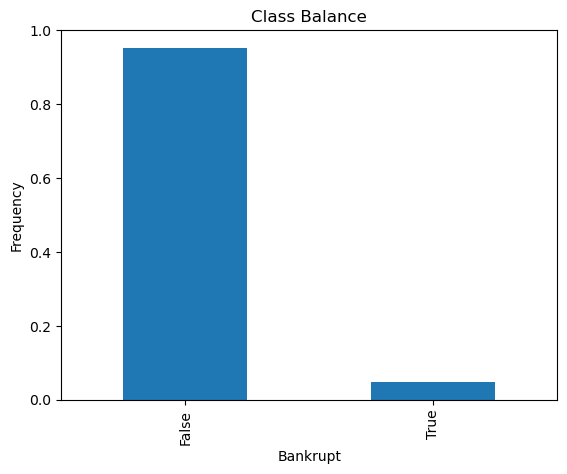

In [55]:
# Plot class balance
df['bankrupt'].value_counts(normalize = True).plot(

    kind = 'bar',
    xlabel = 'Bankrupt',
    ylabel = 'Frequency',
    title = 'Class Balance'
);

Since it looks like most of the companies in our dataset are doing all right for themselves, let's drill down a little farther. However, it also shows us that we have an imbalanced dataset, where our majority class is far bigger than our minority class. There is a clas imbalance

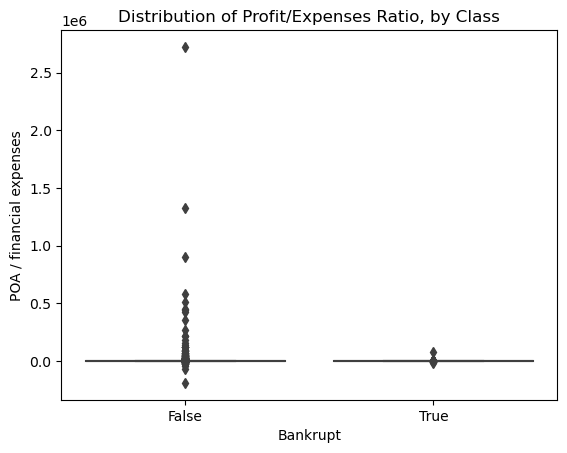

In [57]:
# Create boxplot
sns.boxplot(x = 'bankrupt', y = 'Attr27', data = df)
plt.xlabel("Bankrupt")
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

In [58]:
# Summary statistics for `feat_27`
df['Attr27'].describe().apply('{0:,.0f}'.format)

count        9,788
mean         1,186
std         34,691
min       -190,130
25%              0
50%              1
75%              5
max      2,723,000
Name: Attr27, dtype: object

Note that the median is around 1, but the mean is over 1000. That suggests that this feature is skewed to the right. Let's make a histogram to see what the distribution actually looks like.

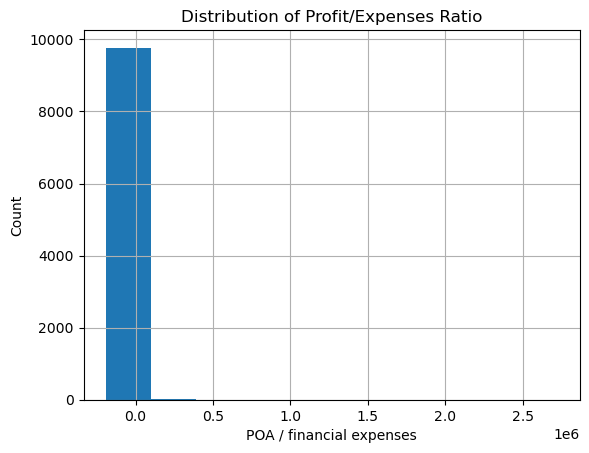

In [59]:
# Plot histogram of `feat_27`
df['Attr27'].hist()
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

We saw it in the numbers and now we see it in the histogram. The data is very skewed. So, in order to create a helpful boxplot, we need to trim the data.